# **<ins style="color:aqua">Feature Engineering</ins>**
## **<ins style="color:green">Handling Missing Values</ins>**
1. ### **<ins style="color:red">(CCA : Complete Case Analysis)</ins>**
   - Remove Hole Row in which NaN value present.
   - Data missing must be random.
   - Complete Case Analysis(CCA), also called "List-Wise Deletion" of cases, consists in discarding observations(Row) where values in any of the variables(Column) are missing.
   - Complete Case Analysis means literally analyzing only those observations for which there is information in all of the variables in the dataset.
   - __Assumption For CCA:__ MCAR : Missing Completely at Random
   - __Advantage__ :
     - Easy to implement as no data manipulation required.
     - Preserves variable distribution (if data is MCAR), then the distribution of the variables of the reduced dataset should match the distribution in the original dataset.
   - __Disadvantage__:
     - It can exclude a large fraction of the original dataset (If mising data is abundant).
     - Excluded observations could be informative for the analysis (if data is not missing at random).
     - When using our models in production, the model will not know how to handle missing data.
   - __When to use CCA.__
     - MCAR : Missing Completely At Random
     - Percentage of the Missing data in column should be high. If percentage of missing data in a column is low then do not apply CCA.

3. ### **<ins style="color:red">Impute(Fill NaN Value)</ins>**
   - #### **Univariate** : _SimpleImputer_ Class Present in Scikit Learn for the _Univariate_.
   - If in a column any missing value is present then fill it using the remain data present in that column.
     - <ins style="color:blue"> __Numerical Type Column__ </ins>
       - Method to fill the Numerical Columns Missing Values.
         - Mean
         - Median
         - Random Value
         - End of Distribution Value
     - <ins style="color:blue"> __Categorical Type Column__ </ins>
       - Method to fill the Categorical Columns Missing Values.
         - Mode
         - Missing Word
   - #### **Multivariate**
   - If in a column any missing value is present then fill it using the data of all other columns.
     - __KNN Imputer__ Method
     - __Iterative Imputer__ Method
- __Missing Indicator__

# **<ins style="color:maroon"> Impute </ins>**
## **<ins style="color:red"> Numerical Data : SimpleImputer </ins>**
- ### **Univariate Imputation**
  - Use available values of same column to fill the missing values of that column.
  - Mean, Median
  - Arbitary
  - End of Distribution
  - Random Value
  - Select best technique to fill the missing value.
- ### **Multivariate Imputation**
  - Use available values of all remain columns to fill the missing value of a column.
  - KNN Imputer
  - Iterative Imputer

## **<ins style="color:blue">Mean, Median Imputation</ins>**
- Distribution is Normal Use Mean.
- Distribution is Skewed Use Median.
- __Pros__
  - Simple to use.
  - If missing value is less(less than 5%), then reliable else it is not reliable. Generaly use it if missing value is less then 5%.
- __Cons__
  - It can change the shape of distribution.
  - It may come Outlier.
  - Covariance and Correlation change.
- __When to Use__
  - MCAR : Missing Completly At Random
  - Less than 5% data missing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
# use fillna() of pandas ------> give you pandas DF.
# use scikit learn -----> give you array.
df = pd.read_csv("../data/titanic_toy36.csv")
df.sample(7)

,Age,Fare,Family,Survived
637,31.0,26.2500,2,0
514,24.0,7.4958,0,0
56,21.0,10.5000,0,1
837,NaN,8.0500,0,0
717,27.0,10.5000,0,1
46,NaN,15.5000,1,0
203,45.5,7.2250,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

### **<em><u>Using Pandas fillna()</u></em>**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [8]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [9]:
X_train.sample(7)

,Age,Fare,Family
616,34.00,14.4000,2
750,4.00,23.0000,2
327,36.00,NaN,0
689,15.00,211.3375,1
803,0.42,8.5167,1
776,NaN,7.7500,0
860,41.00,NaN,2


In [10]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [11]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [12]:
X_train.sample(7)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
148,36.5,26.0000,2,36.50,36.500000,26.0000,26.0000
289,22.0,7.7500,0,22.00,22.000000,7.7500,7.7500
240,NaN,14.4542,1,28.75,29.785904,14.4542,14.4542
789,46.0,79.2000,0,46.00,46.000000,79.2000,79.2000
832,NaN,7.2292,0,28.75,29.785904,7.2292,7.2292
170,61.0,33.5000,0,61.00,61.000000,33.5000,33.5000
397,46.0,26.0000,0,46.00,46.000000,26.0000,26.0000


In [13]:
print("Original Age Variable Variance : ", X_train['Age'].var())
print("Age Variance after median imputation : ", X_train['Age_median'].var())
print("Age Variance after mean imputation : ", X_train['Age_mean'].var())

print("Original Fare Variable Variance : ", X_train['Fare'].var())
print("Fare Variance after median imputation : ", X_train['Fare_median'].var())
print("Fare Variance after mean imputation : ", X_train['Fare_mean'].var())

Original Age Variable Variance :  204.3495133904614
Age Variance after median imputation :  161.9895663346054
Age Variance after mean imputation :  161.81262452718673
Original Fare Variable Variance :  2448.197913706318
Fare Variance after median imputation :  2340.0910219753637
Fare Variance after mean imputation :  2324.2385256705547


In [14]:
X_train.var()   # variance

Age             204.349513
Fare           2448.197914
Family            2.735252
Age_median      161.989566
Age_mean        161.812625
Fare_median    2340.091022
Fare_mean      2324.238526
dtype: float64

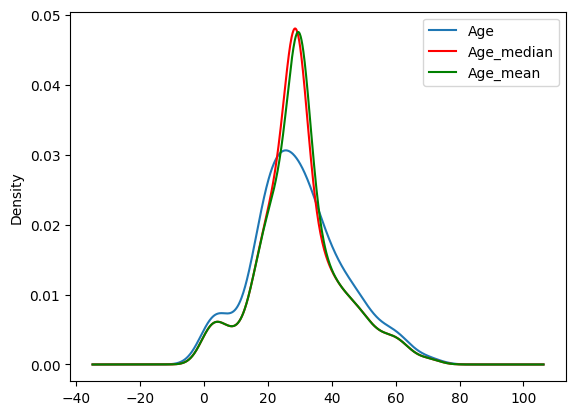

In [15]:
# Age
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

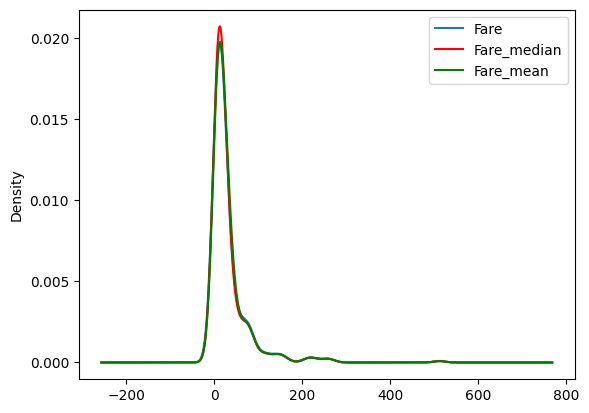

In [16]:
# Fare
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [17]:
X_train.cov()   # covariance

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [18]:
X_train.corr()     # correlation

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


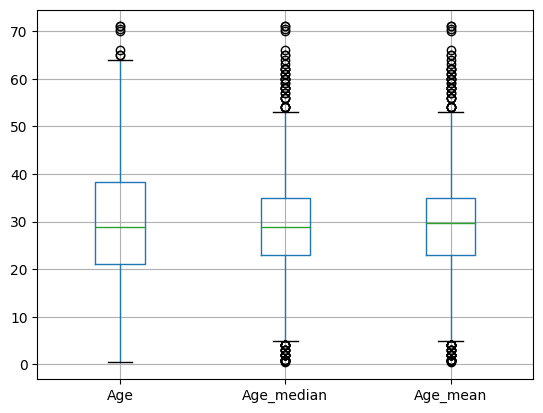

In [19]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()
plt.show()
# increase outliers

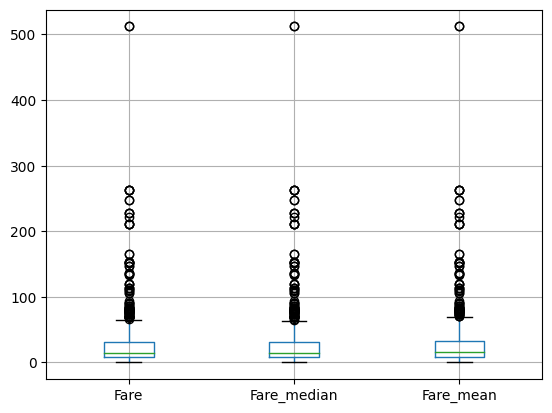

In [20]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()
plt.show()
# increase outliers

### **<em><u>Using Sklearn</u></em>**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
# strategy = mean, median, most_frequent, constant
imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='mean')

In [23]:
trf = ColumnTransformer([
    ('imputer1(Median)_Age', imputer1, ['Age']),
    ('imputer2(Mean)_Fare', imputer2, ['Fare'])
], remainder='passthrough')

In [24]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1(Median)_Age',
                                 SimpleImputer(strategy='median'), ['Age']),
                                ('imputer2(Mean)_Fare', SimpleImputer(),
                                 ['Fare'])])

In [25]:
trf.named_transformers_['imputer1(Median)_Age'].statistics_

array([28.75])

In [26]:
trf.named_transformers_['imputer2(Mean)_Fare'].statistics_

array([32.61759689])

In [27]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [28]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

## **<ins style="color:blue">Arbitary Value Imputation</ins>**
- Use more with categorical values. Replace all missing value with "Missing".
- We can use this with numerical values. Replace missing value with any arbitary number.
- **Pros**
  - Easy to apply.
- **Cons**
  - PDF Distorted Changes
  - Variance Changes
  - Covariance Changes
- It does not use more with numerical data.
- Use this method if dataset is not missing Random. If dataset is missing random then use mean, median.

### **<em><u>Using Pandas(General Method)</u></em>**

In [29]:
df.sample(7)

,Age,Fare,Family,Survived
495,NaN,14.4583,0,0
581,39.0,110.8833,2,1
480,9.0,46.9000,7,0
709,NaN,15.2458,2,1
392,28.0,7.9250,2,0
182,9.0,31.3875,6,0
412,33.0,90.0000,1,1


In [30]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [31]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [33]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [34]:
X_train.sample(7)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
378,20.0,NaN,0,20.0,20.0,999.0000,-1.0000
517,NaN,24.1500,0,99.0,-1.0,24.1500,24.1500
701,35.0,26.2875,0,35.0,35.0,26.2875,26.2875
300,NaN,7.7500,0,99.0,-1.0,7.7500,7.7500
437,24.0,18.7500,5,24.0,24.0,18.7500,18.7500
314,43.0,26.2500,2,43.0,43.0,26.2500,26.2500
243,22.0,7.1250,0,22.0,22.0,7.1250,7.1250


In [35]:
X_train.var()

Age              204.349513
Fare            2448.197914
Family             2.735252
Age_99           951.727557
Age_minus1       318.089620
Fare_999       47219.202652
Fare_minus1     2378.567678
dtype: float64

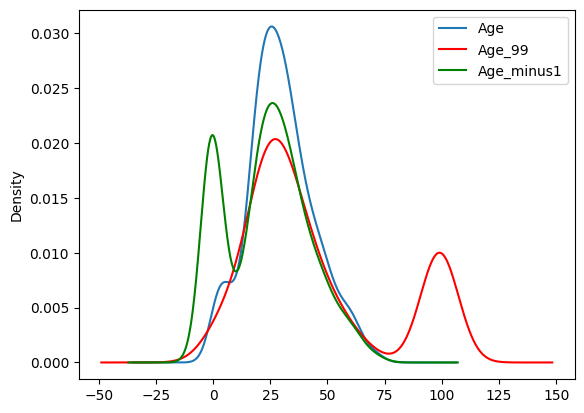

In [37]:
# Age
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

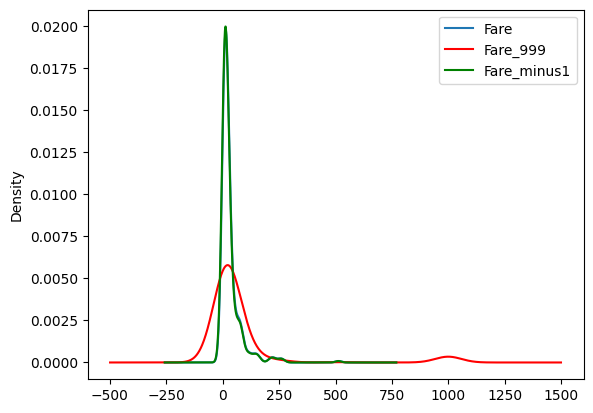

In [36]:
# Fare
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [38]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [42]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


In [39]:
X_train.var()

Age              204.349513
Fare            2448.197914
Family             2.735252
Age_99           951.727557
Age_minus1       318.089620
Fare_999       47219.202652
Fare_minus1     2378.567678
dtype: float64

### **<em><u>Using Sklearn</u></em>**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [44]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [45]:
trf = ColumnTransformer([
    ('imputer1_Age', imputer1, ['Age']),
    ('imputer2_Fare', imputer2, ['Fare'])
], remainder='passthrough')

In [46]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1_Age',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2_Fare',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [48]:
trf.named_transformers_['imputer1_Age'].statistics_

array([99.])

In [49]:
trf.named_transformers_['imputer2_Fare'].statistics_

array([999.])

In [50]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [51]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

## **<ins style="color:blue">End of Distribution Imputation</ins>**
- 

In [ ]:
#26:01